# Heart Disease Classification using DecisionTree vs RandomForest vs AdaBoost models

# Import libraries

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [81]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Data Analysis

<Axes: xlabel='sex', ylabel='count'>

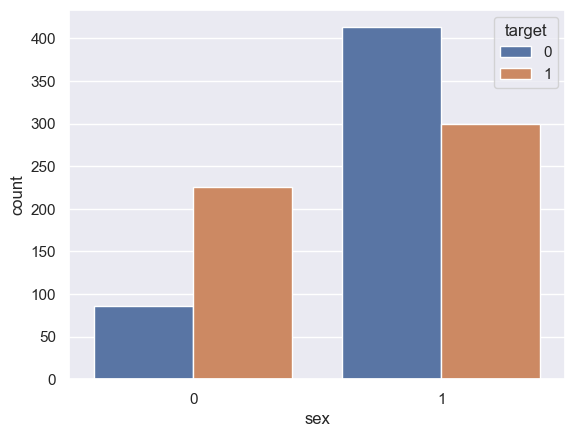

In [82]:
sns.countplot(data=df, x='sex', hue='target')

<Axes: xlabel='age', ylabel='Count'>

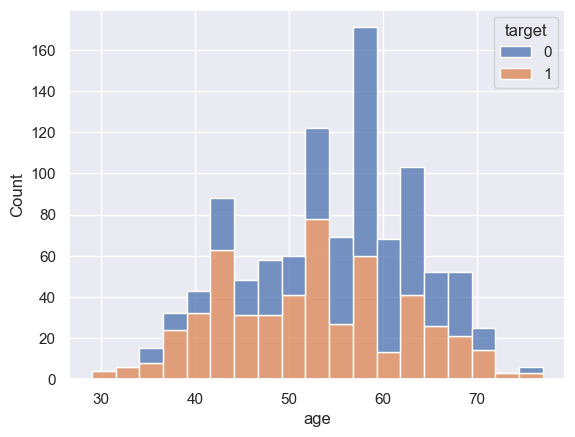

In [83]:
sns.histplot(data=df, x='age', hue='target', multiple='stack')

<Axes: xlabel='chol', ylabel='Count'>

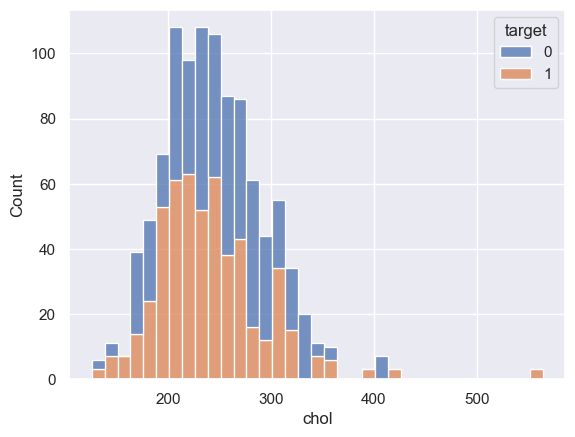

In [84]:
sns.histplot(data=df, x='chol', hue='target', multiple='stack')

<Axes: xlabel='trestbps', ylabel='Count'>

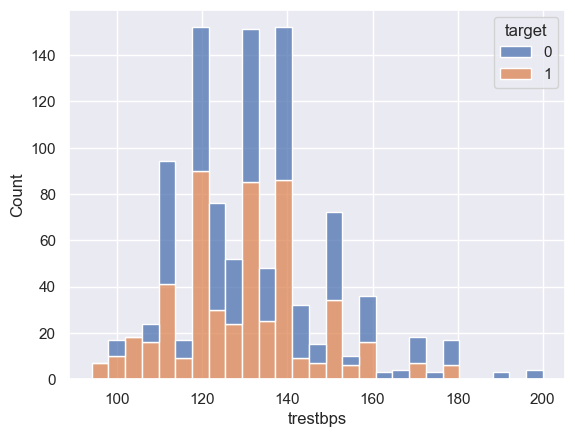

In [85]:
sns.histplot(data=df, x='trestbps', hue='target', multiple='stack')

<Axes: xlabel='thalach', ylabel='Count'>

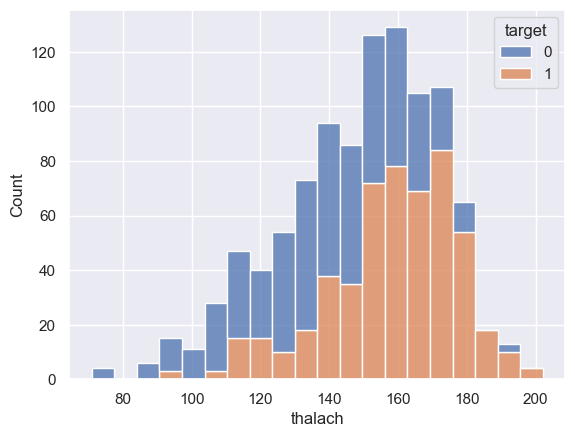

In [86]:
sns.histplot(data=df, x='thalach', hue='target', multiple='stack')

# Data Preprocessing

In [87]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

target
1    526
0    499
Name: count, dtype: int64


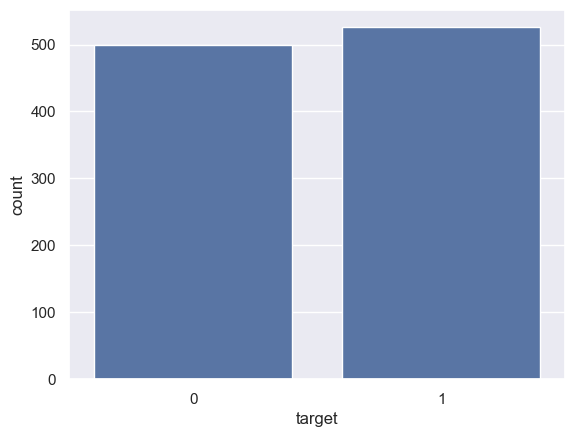

In [88]:
sns.countplot(x=df['target'])
print(df.target.value_counts())

# Outlier detection using boxplot

<Axes: xlabel='age'>

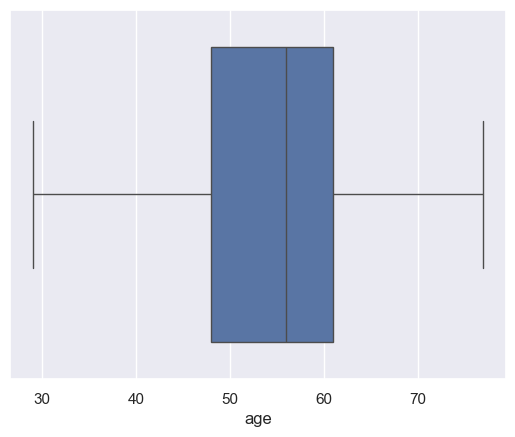

In [89]:
sns.boxplot(x=df['age'])

<Axes: xlabel='trestbps'>

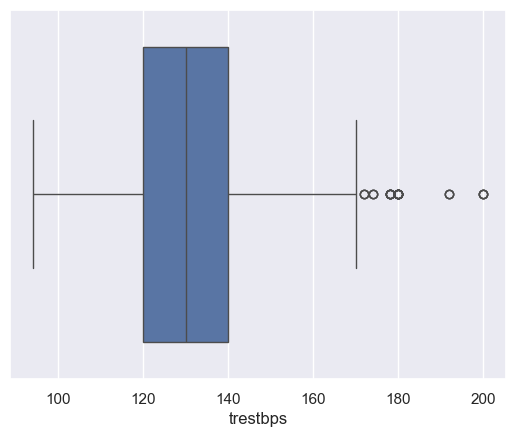

In [90]:
sns.boxplot(x=df['trestbps'])

<Axes: xlabel='chol'>

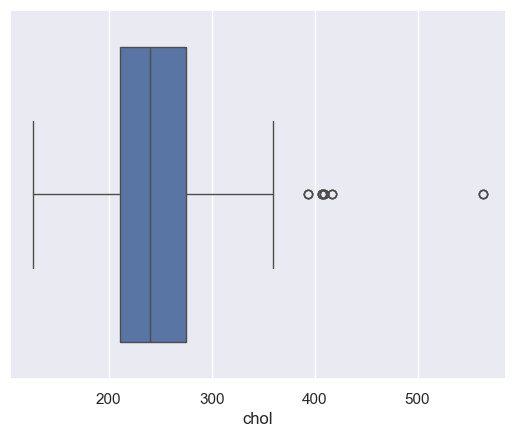

In [91]:
sns.boxplot(x=df['chol'])

<Axes: xlabel='thalach'>

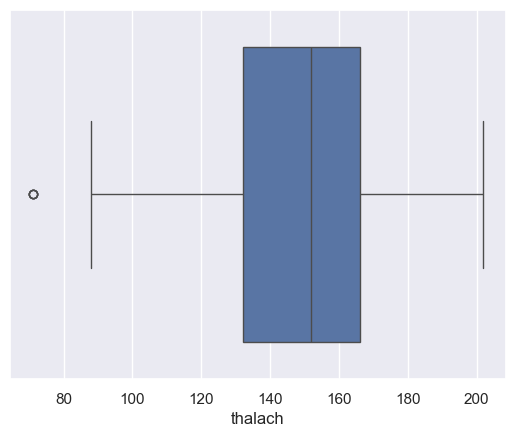

In [92]:
sns.boxplot(x=df['thalach'])

<Axes: xlabel='oldpeak'>

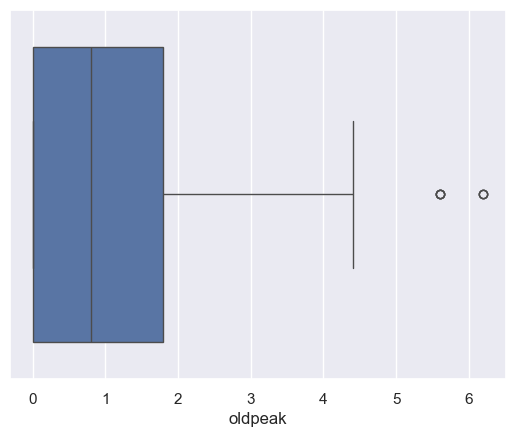

In [93]:
sns.boxplot(x=df['oldpeak'])

# Outlier removal  using Z-Score

In [94]:
import scipy.stats as stats
z = np.abs(stats.zscore(df))
data_clean = df[(z<3).all(axis=1)]
data_clean.shape

(969, 14)

In [95]:
df.shape

(1025, 14)

# data correlation using Heatmap

<Axes: >

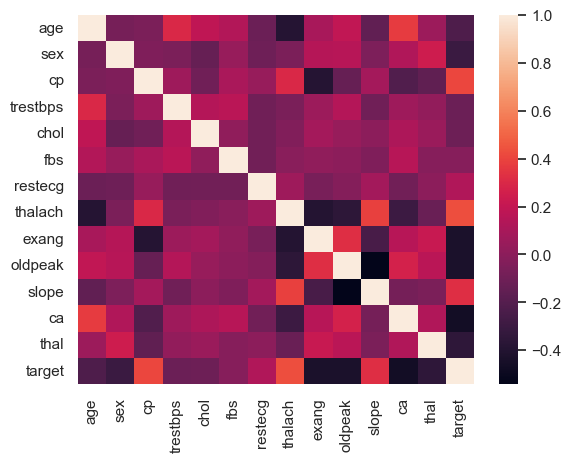

In [96]:
sns.heatmap(data_clean.corr(), fmt='.2g')

# correlation between class and other attributes

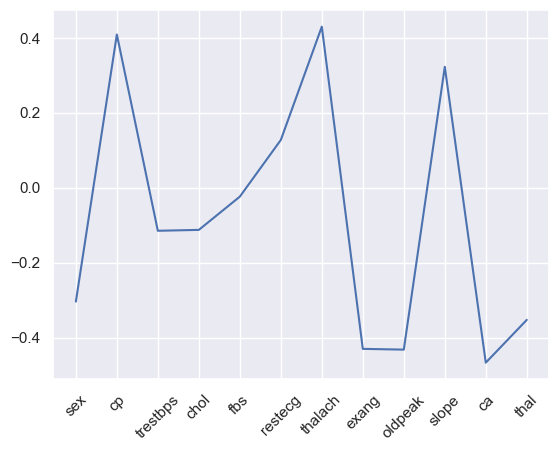

In [97]:
corr = data_clean[data_clean.columns[1:]].corr()['target'][:-1]
plt.plot(corr)
plt.xticks(rotation=45)
plt.show()

# Machine learning model building

In [98]:
X = data_clean.drop('target', axis=1)
y = data_clean['target']

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [101]:
y_pred = dtree.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy Score:', round(accuracy_score(y_test, y_pred)*100,2), '%')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classificatin Report:\n', classification_report(y_test, y_pred))

Accuracy Score: 100.0 %
Confusion Matrix:
 [[ 91   0]
 [  0 103]]
Classificatin Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       103

    accuracy                           1.00       194
   macro avg       1.00      1.00      1.00       194
weighted avg       1.00      1.00      1.00       194



# Feature Importance

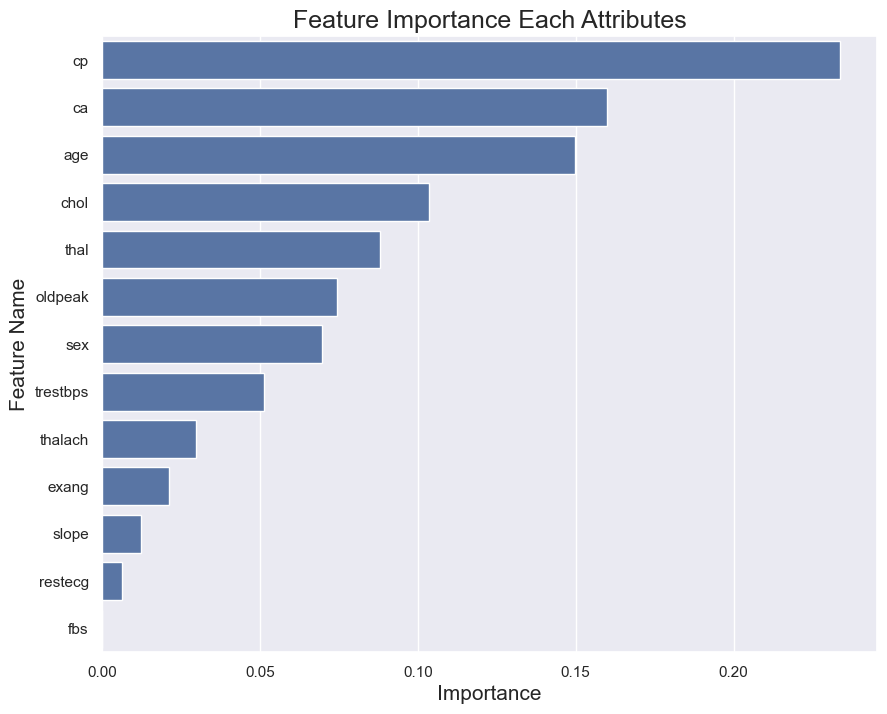

In [103]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes', fontsize=18)
plt.xlabel ('Importance', fontsize=15)
plt.ylabel ('Feature Name', fontsize=15)
plt.show()

# Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [105]:
y_pred = rfc.predict(X_test)

In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy Score:', round(accuracy_score(y_test, y_pred)*100,2), '%')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classificatin Report:\n', classification_report(y_test, y_pred))

Accuracy Score: 100.0 %
Confusion Matrix:
 [[ 91   0]
 [  0 103]]
Classificatin Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       103

    accuracy                           1.00       194
   macro avg       1.00      1.00      1.00       194
weighted avg       1.00      1.00      1.00       194



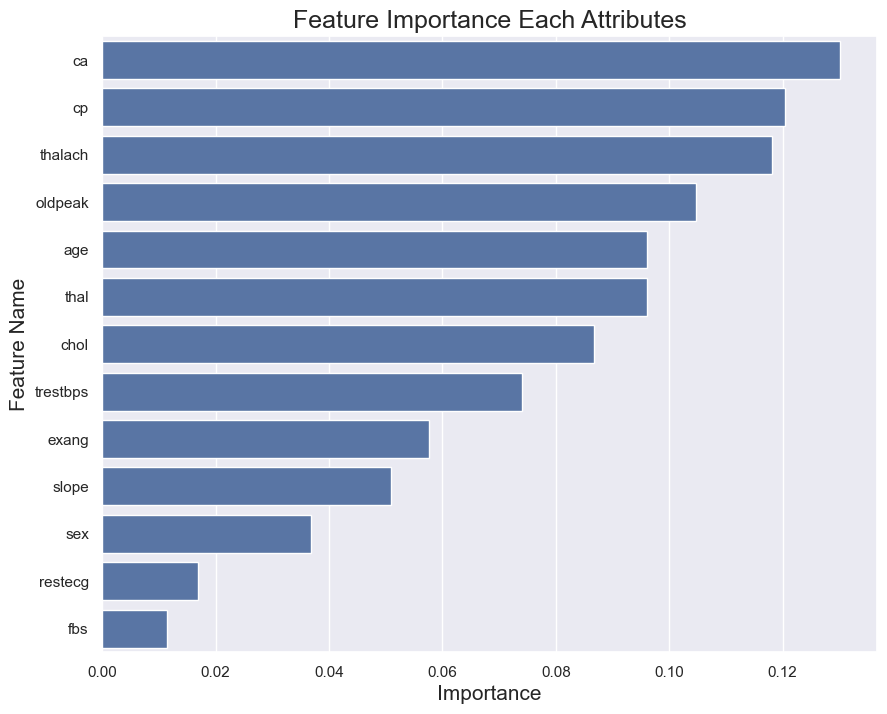

In [107]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes', fontsize=18)
plt.xlabel ('Importance', fontsize=15)
plt.ylabel ('Feature Name', fontsize=15)
plt.show()

# AdaBoost model

In [108]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train ,y_train)

C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [109]:
y_pred = ada.predict(X_test)

In [110]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy Score:', round(accuracy_score(y_test, y_pred)*100,2), '%')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classificatin Report:\n', classification_report(y_test, y_pred))

Accuracy Score: 93.3 %
Confusion Matrix:
 [[85  6]
 [ 7 96]]
Classificatin Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93        91
           1       0.94      0.93      0.94       103

    accuracy                           0.93       194
   macro avg       0.93      0.93      0.93       194
weighted avg       0.93      0.93      0.93       194



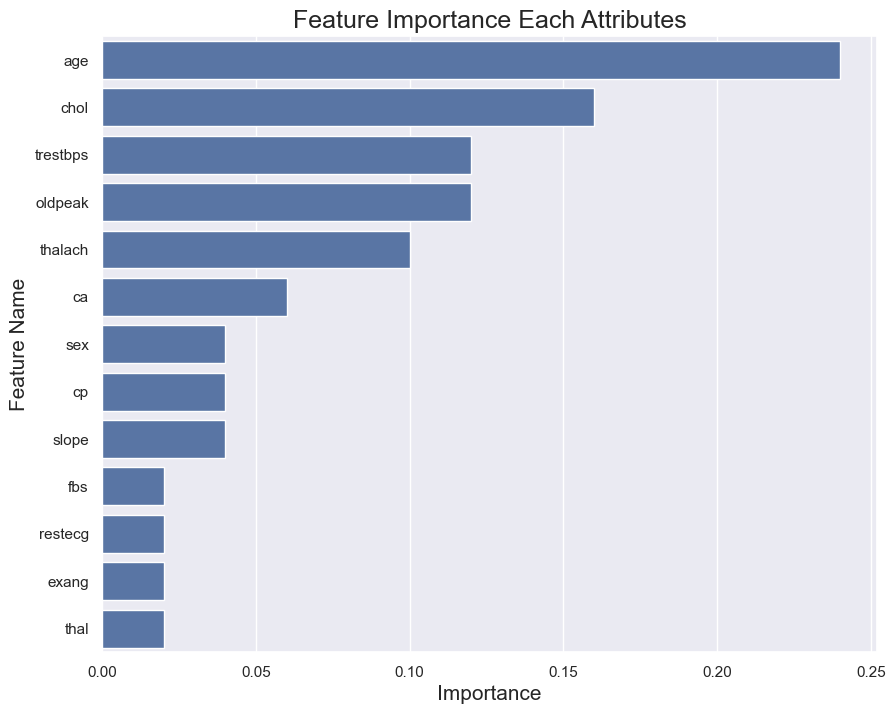

In [111]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": ada.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes', fontsize=18)
plt.xlabel ('Importance', fontsize=15)
plt.ylabel ('Feature Name', fontsize=15)
plt.show()

# DecisionTree and RandomForest 100% accuracy so suitable models